In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

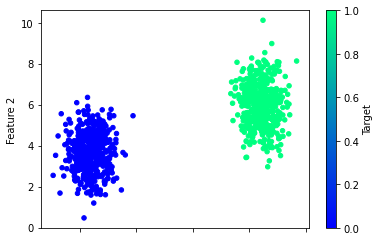

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [3]:
df

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1
...,...,...,...
995,6.208962,5.233968,1
996,-9.795754,3.502709,0
997,4.335167,5.928298,1
998,-8.466632,3.577022,0


In [4]:
df["Target"].value_counts()

1    500
0    500
Name: Target, dtype: int64

array([[<AxesSubplot:title={'center':'Feature 1'}>,
        <AxesSubplot:title={'center':'Feature 2'}>],
       [<AxesSubplot:title={'center':'Target'}>, <AxesSubplot:>]],
      dtype=object)

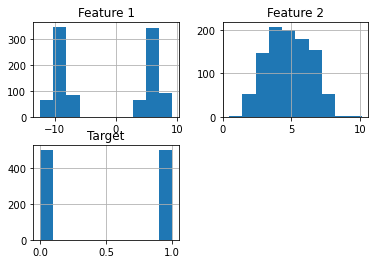

In [5]:
df.hist()

In [6]:
df.describe()

,Feature 1,Feature 2,Target
count,1000.000000,1000.000000,1000.00000
mean,-1.510537,4.818695,0.50000
std,7.634715,1.548696,0.50025
min,-12.380816,0.470104,0.00000
25%,-9.104230,3.598370,0.00000
50%,-0.976028,4.763438,0.50000
75%,6.083629,6.094444,1.00000
max,9.180235,10.118125,1.00000


In [7]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [8]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [10]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [11]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [12]:
# Check the structure of the Sequential model
nn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
24/24 [==============================] - 0s 875us/step - loss: 1.0695 - accuracy: 0.0307
Epoch 2/100
24/24 [==============================] - 0s 828us/step - loss: 1.0320 - accuracy: 0.0227
Epoch 3/100
24/24 [==============================] - 0s 805us/step - loss: 0.9977 - accuracy: 0.0240
Epoch 4/100
24/24 [==============================] - 0s 809us/step - loss: 0.9664 - accuracy: 0.0253
Epoch 5/100
24/24 [==============================] - 0s 742us/step - loss: 0.9377 - accuracy: 0.0333
Epoch 6/100
24/24 [==============================] - 0s 707us/step - loss: 0.9113 - accuracy: 0.0347
Epoch 7/100
24/24 [==============================] - 0s 682us/step - loss: 0.8880 - accuracy: 0.0467
Epoch 8/100
24/24 [==============================] - 0s 757us/step - loss: 0.8666 - accuracy: 0.0587
Epoch 9/100
24/24 [==============================] - 0s 689us/step - loss: 0.8469 - accuracy: 0.0693
Epoch 10/100
24/24 [==============================] - 0s 674us/step - loss: 0.8288 - accura

<AxesSubplot:>

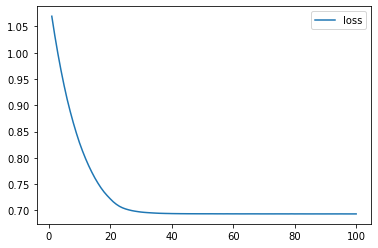

In [16]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

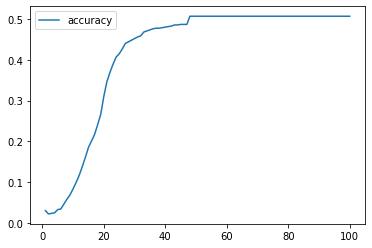

In [17]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6937 - accuracy: 0.4800 - 149ms/epoch - 19ms/step
Loss: 0.6936914324760437, Accuracy: 0.47999998927116394


In [19]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])